# <span style="color:darkorange"> Stationaire tijdsreeksen demo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
plt.style.use('seaborn')
import numpy as np

We gaan starten met het inlezen van het bestand: `bezoekers.csv` maar we gaan de kolom Tijdstip gebruiken als de index van de dataframe.

In [3]:
dataset = pd.read_csv('bezoekers.csv', index_col='Tijdstip')
dataset.head()

,dagelijks aantal bezoekers (in honderden)
Tijdstip,
0,17
1,13
2,14
3,17
4,17


## <span style="color:deeppink"> Stationair? </span>
Plot het aantal bezoekers en ga na of de dataset stationair is.

Text(0, 0.5, 'Aantal bezoekers')

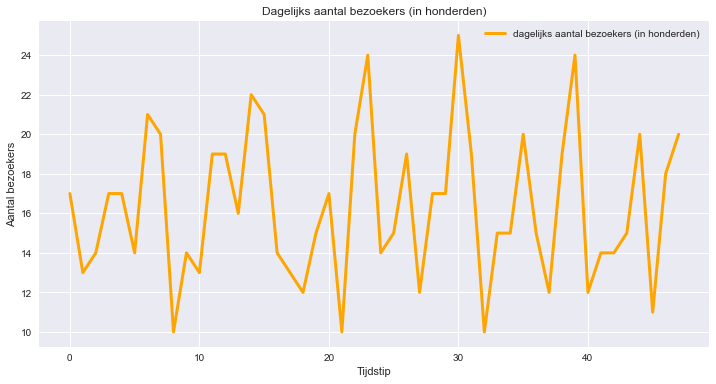

In [4]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Dagelijks aantal bezoekers (in honderden)')
plt.xlabel("Tijdstip")
plt.ylabel("Aantal bezoekers")

In [5]:
from sklearn import datasets, linear_model
x = dataset.index.values
y = dataset['dagelijks aantal bezoekers (in honderden)'].values


regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = 16.083333333333332
Richtingscoëfficiënt =  0.010638297872340427


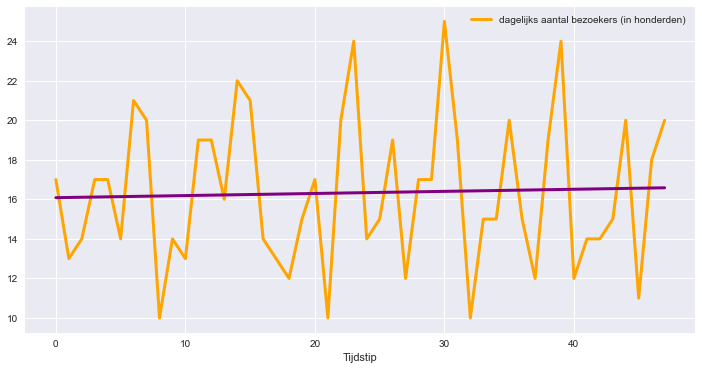

In [6]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
sns.set_style("darkgrid")

## <span style="color:deeppink"> Autocorrelatie </span>

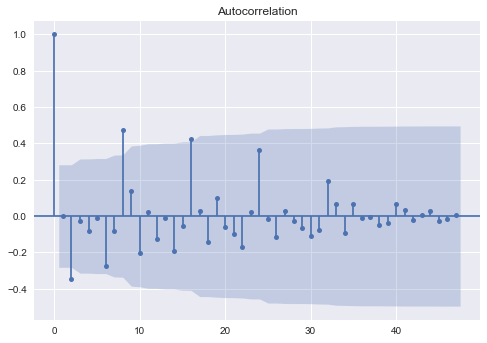

In [21]:
fig = plot_acf(dataset['dagelijks aantal bezoekers (in honderden)'], lags=len(dataset)-1)

## <span style="color:deeppink"> Moving average </span>
Bereken de 3-punts moving average aan de hand van de functies:  
`rolling`:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html  
deze functie zorgt voor een sliding window over je kolom. => Hier pas je dan de gewenste statistische functie op toe  
En de functie   
    `shift`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html  
zorg je ervoor dat alle waarden een rij naar beneden schuiven.

In [8]:
dataset['MA_3'] = dataset['dagelijks aantal bezoekers (in honderden)'].rolling(3).mean().shift(1)
print(dataset.shape)
dataset.head()

(48, 2)


,dagelijks aantal bezoekers (in honderden),MA_3
Tijdstip,,
0,17,NaN
1,13,NaN
2,14,NaN
3,17,14.666667
4,17,14.666667


Text(0, 0.5, 'dagelijks aantal bezoekers (in honderden)')

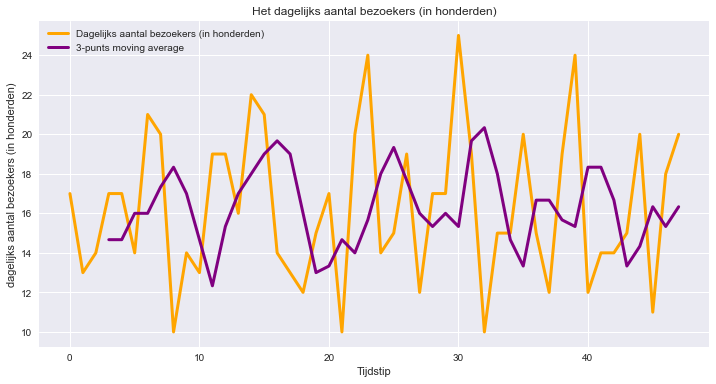

In [9]:
colors = ['orange', 'purple']
dataset.plot(color=colors, linewidth=3, figsize=(12,6))
plt.legend(labels = ['Dagelijks aantal bezoekers (in honderden)', '3-punts moving average'])
plt.title("Het dagelijks aantal bezoekers (in honderden)")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])

## <span style="color:deeppink"> Mean absolute error
Bereken de absolute error van de 3-punts moving average:

In [10]:
dataset['absolute error MA3'] = abs(dataset['dagelijks aantal bezoekers (in honderden)'] - dataset.MA_3)
print(dataset.head())
mae = dataset['absolute error MA3'].mean()
mae

          dagelijks aantal bezoekers (in honderden)       MA_3  \
Tijdstip                                                         
0                                                17        NaN   
1                                                13        NaN   
2                                                14        NaN   
3                                                17  14.666667   
4                                                17  14.666667   

          absolute error MA3  
Tijdstip                      
0                        NaN  
1                        NaN  
2                        NaN  
3                   2.333333  
4                   2.333333  


4.0592592592592585

## <span style="color:deeppink"> Mean absolute percentage error

In [11]:
dataset['MAPE MA3'] = abs(dataset['absolute error MA3']/dataset['dagelijks aantal bezoekers (in honderden)']*100)
mape = dataset["MAPE MA3"].mean()
print("De mean absolute percentage error is: ", mape, "%")

De mean absolute percentage error is:  26.513994842701404 %


## <span style="color:deeppink"> Exponentiele demping:
Gebruik de functie `emw` om exponentiele demping toe te passen:  
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ewm.html

In [12]:
dataset['exponential_0.1'] = dataset['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=0.1, adjust=False).mean().shift(1)
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1
Tijdstip,,,,,
0,17,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000
2,14,NaN,NaN,NaN,16.600
3,17,14.666667,2.333333,13.72549,16.340
4,17,14.666667,2.333333,13.72549,16.406


In [13]:
dataset['absolute error exponentiele demping'] = abs(dataset['dagelijks aantal bezoekers (in honderden)'] - dataset['exponential_0.1'])
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1,absolute error exponentiele demping
Tijdstip,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000,4.000
2,14,NaN,NaN,NaN,16.600,2.600
3,17,14.666667,2.333333,13.72549,16.340,0.660
4,17,14.666667,2.333333,13.72549,16.406,0.594


In [14]:
mae_exponential = dataset['absolute error exponentiele demping'].mean()
print(mae_exponential)

3.4251658667716702


## <span style="color:deeppink"> Zoek de optimale alpha

In [15]:
step = 1e-3
alphas = np.arange(start=0, stop=1+step, step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
    exponential = []
    exponential = dataset['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['dagelijks aantal bezoekers (in honderden)'] - exponential).mean())

df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'

minimum_mae = df['mae'].min()
print("The alpha with the lowest MAE is: ", minimum_mae, "index: ")
print("index: ", df[df['mae'] == minimum_mae].index[0])



The alpha with the lowest MAE is:  3.277548181312891 index: 
index:  0.001


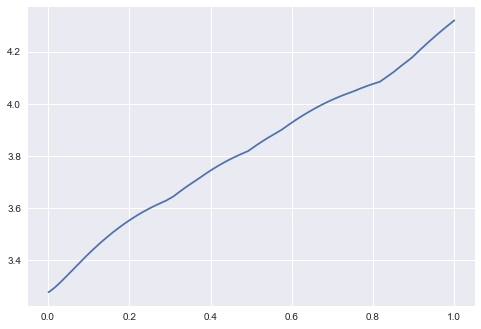

In [16]:
plt.plot(df['mae'])

In [17]:
dataset['exponential_0.001'] = dataset['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=0.001, adjust=False).mean().shift(1)
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1,absolute error exponentiele demping,exponential_0.001
Tijdstip,,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000,4.000,17.000000
2,14,NaN,NaN,NaN,16.600,2.600,16.996000
3,17,14.666667,2.333333,13.72549,16.340,0.660,16.993004
4,17,14.666667,2.333333,13.72549,16.406,0.594,16.993011


In [18]:
dataset['absolute error exp alpha 0.001'] = abs(dataset['dagelijks aantal bezoekers (in honderden)'] - dataset['exponential_0.001'])
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1,absolute error exponentiele demping,exponential_0.001,absolute error exp alpha 0.001
Tijdstip,,,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000,4.000,17.000000,4.000000
2,14,NaN,NaN,NaN,16.600,2.600,16.996000,2.996000
3,17,14.666667,2.333333,13.72549,16.340,0.660,16.993004,0.006996
4,17,14.666667,2.333333,13.72549,16.406,0.594,16.993011,0.006989


In [19]:
mae_exponential = dataset['absolute error exp alpha 0.001'].mean()
print(mae_exponential)

3.277548181312891


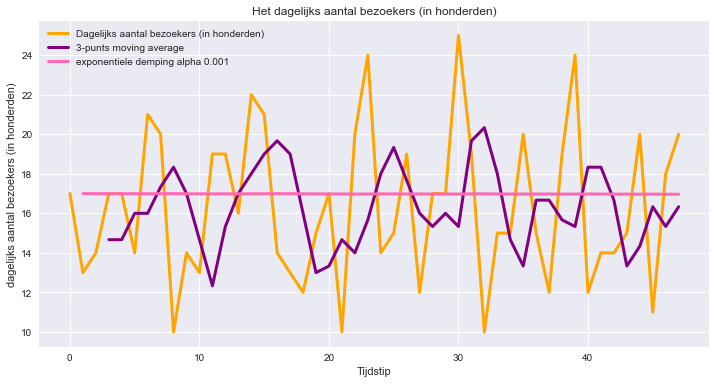

In [20]:
dataset['dagelijks aantal bezoekers (in honderden)'].plot(color='orange', linewidth=3, figsize=(12,6))
dataset['MA_3'].plot(color = 'purple', linewidth=3)
dataset['exponential_0.001'].plot(color = 'hotpink', linewidth=3)
plt.legend(labels = ['Dagelijks aantal bezoekers (in honderden)', '3-punts moving average', 'exponentiele demping alpha 0.001'])
plt.title("Het dagelijks aantal bezoekers (in honderden)")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])
sns.set_style("darkgrid")